#####  Parte 3 de 4
#### Ingeniero en Sistemas: Erick J. Pineda Amézquita  
Correo de contacto: epineda.amezquita@gmail.com  
github: https://github.com/epinedaWorks/

Ejercicios basados en el material de apoyo de DataCamp  
https://campus.datacamp.com/courses/image-processing-in-python/  

Las imagenes de ejemplo se encuentran en el directorio "imagenes", se hace referencia por medio de **./imagenes/**  
Si se desea, por facilidad, pueden colocarse en el mismo directorio donde se encuentra el arhivo python o notebook ipynb




# Restauración de imágenes, eliminación de ruido, borrado de objetos, superpixeles y segmentación, encontrar contornos

## Procesamiento de imagenes -- Requisitos

Para los siguientes ejemplos, se va a utilizar la herramienta de SCIKIT IMAGE.  
Se requiere instalar dicha librería para hacer uso de todas las funciones que provee la herramienta.  
Para instalar en Windows se requiere acceder a la consola de comandos en modo Administrador y ejecutar la siguiente instrucción:  


**$ pip install scikit-image**  

Si no funciona, probar con:   

**$ conda install -c conda-forge scikit-image**  

No esta de mas realizar un test de los paquetes que se requieren, ya sea antes o después de la instalación de scikit-image por medio de las siguientes instrucciones:  

**$ pytest --pyargs skimage**

Fuente:  
https://scikit-image.org/docs/stable/install.html  
  
**Como primer paso: Ejecutar las siguientes lineas para saber si todo está correcto, si no funciona, revisar instalación**


In [2]:
# Import the modules from skimage
from skimage import data, color

import matplotlib.pyplot as plt
import numpy as np
import cv2


## Funciones básicas para visualizar imágenes

Comenzamos por importar la librería, si la siguiente instrucción muestra error, será necesario revisar la instalación de scikit image.

Se crea un metodo que va a leer las imagenes por medio de matplotlib.

In [3]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()


Se crea una función de comparación para dos imagenes:

In [4]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
  sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis('off')


## Analizando coordenadas de una imágen y su manipulación
Función inpaint: Se utiliza para restaurar imágenes dañadas o deterioradas, para quitar objetos, quitar marcas o logos  seleccionando áreas específicas para reemplazar pixeles "no deseados"

Tamaño de la imagen:  (1033, 1280, 3)


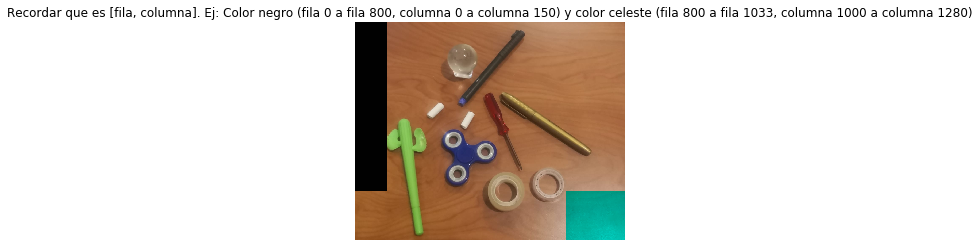

In [5]:
# Import the module from restoration
from skimage.restoration import inpaint


imgName = "./imagenes/lapiceros.JPG"    
imgLapiceros = cv2.imread(imgName)
imgLapicerosRGB = cv2.cvtColor(imgLapiceros, cv2.COLOR_BGR2RGB)

print("Tamaño de la imagen: ",imgLapicerosRGB.shape)

# Parte superior
imgLapicerosRGB[0:800, 0:150] = 1

# Parte inferior, se selecciona un canal específico
imgLapicerosRGB[800:1033, 1000:1280,0] = 1

show_image(imgLapicerosRGB, 'Recordar que es [fila, columna]. Ej: Color negro (fila 0 a fila 800, columna 0 a columna 150) y color celeste (fila 800 a fila 1033, columna 1000 a columna 1280)')

## NOTA IMPORTANTE
Observar que en el ejemplo anterior, al modificar los valores de la imágen, las coordenadas iniciales comienzan en la esquina superior izquierda, es decir, no son coordenadas cartesianas ya que al cargar la imágen por medio de OpenCV éste utiliza el sistema (fila, columna), o también conocido como "image notation":

<pre>
0/0---column--->  
 |  
 |  
row  
 |  
 |  
 v  
 
Como punto adicional y para cultura general:

So in OpenCV you can use: mat.at<type>(row,column) or mat.at<type>(cv::Point(x,y)) to access the same point if x=column and y=row which is perfectly comprehensible =)
    
</pre>
 

### Quitar elementos de una imágen: 
Función: inpaint_biharmonic.  

Según los ejemplos realizados, la matriz máscara utilizada no debe ser muy grande, al menos, si es cuadrada.
Un tamaño que me ha funcionado ha sido de alrededor de 150x200.  

Como se puede observar en los siguientes ejemplos, el borrado de objetos puede no ser muy preciso. Si se desea mayor presición habría que mapear el objeto por medio de un algoritmo de inteligencia artificial o manualmente buscar las coordenas para crear una matriz o máscara que se acomode al objeto.  
Se recomienda no tener máscaras muy grandes, en las pruebas realizadas, el procesamiento se volvió muy costoso en tiempo y cpu.



Dimensiones:  (1219, 1639, 3)


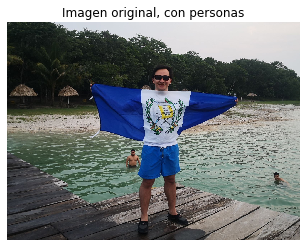

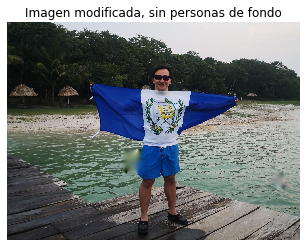

In [19]:
# Import the module from restoration
from skimage.restoration import inpaint


imgName = "./imagenes/bandera.jpg"    
imgBandera = cv2.imread(imgName)
imgBanderaRGB = cv2.cvtColor(imgBandera, cv2.COLOR_BGR2RGB)
print("Dimensiones: ",imgBanderaRGB.shape)


# Initialize the mask
mask = np.zeros(imgBanderaRGB.shape[:-1])

# Set the pixels where the logo is to 1
#mask[690:840, 650:741] = 1
#mask[824:941, 1470:1600] = 1
mask[710:845, 648:755] = 1
mask[839:935, 1490:1559] = 1


# Apply inpainting to remove the logo
imgBanderaSinChatios = inpaint.inpaint_biharmonic(imgBanderaRGB,
                                  mask,
                                 multichannel=True)

# Show the original and logo removed images
show_image(imgBanderaRGB, 'Imagen original, con personas')
show_image(imgBanderaSinChatios, 'Imagen modificada, sin personas de fondo')

## Eliminar o agregar ruido a una imagen
Se utiliza si se desea dar un efecto de antiguedad a una imágen, o bien para quitar defectos que el sensor de la cámara ha capturado.  
Existen diversos métodos para quitar el ruido:  
+ Variación total (TV) 
Aplica el filtro de forma general.
+ Bilateral
Sirve para conservar los bordes o lineas
+ Wavelet denoising
+ No local

### Agrear ruido a una imagen

Dimensiones:  (744, 992, 3)


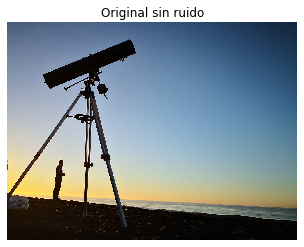

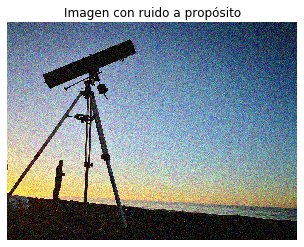

In [21]:
# Import the module and function
from skimage.util  import random_noise

imgName = "./imagenes/telescopio.jpg"    
imgTelescoio = cv2.imread(imgName)
imgTelescoioRGB = cv2.cvtColor(imgTelescoio, cv2.COLOR_BGR2RGB)
print("Dimensiones: ",imgTelescoioRGB.shape)

# Add noise to the image
imgTelescoioConRuido = random_noise(imgTelescoioRGB)

# Show original and resulting image
show_image(imgTelescoioRGB, 'Original sin ruido')
show_image(imgTelescoioConRuido, 'Imagen con ruido a propósito')

### Reducción de ruido por el método de variación total


Dimensiones:  (744, 992, 3)


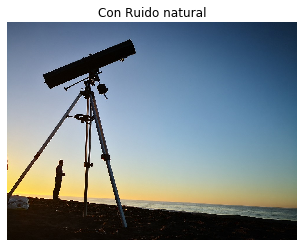

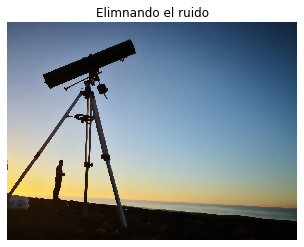

In [22]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

imgName = "./imagenes/telescopio.jpg"    
imgTelescoio = cv2.imread(imgName)
imgTelescoioRGB = cv2.cvtColor(imgTelescoio, cv2.COLOR_BGR2RGB)
print("Dimensiones: ",imgTelescoioRGB.shape)

# Apply total variation filter denoising
imgTelescoioSinRuido = denoise_tv_chambolle(imgTelescoioRGB, 
                                      multichannel=True)

# Show the noisy and denoised images
show_image(imgTelescoioRGB, 'Con Ruido natural')
show_image(imgTelescoioSinRuido, 'Eliminando el ruido')

### Superpixeles y Segmentación

Como se puede observar en los ejemplos anteriores, el borrado de objetos puede no ser muy preciso. Una de las técnicas de poder tener mejor presición es dividiendo la imágen, para ello se tiene el concepto de:  
+ Superpixeles  
Son partes de la imagen que se dividen por tener color o forma común. 
+ Segmentación  
Es la cantidad de veces que la imágen se divide, el default de la librería a utilizar es de 100, sin embargo se puede asignar manualmente.  

La finalidad de hacer segmentaciones es separar las partes de una imágen, por ejemplo en una tomografía se desea separar el área que tiene un tumor, o en el caso de querer reconocer frutas, es necesario separarlas por color o forma, posterior a ello, realizar una binarización de la imagen para quitar el fondo o el frente de la imágen. Hay algoritmos de inteligencia artificial que ya lo hacen, el más común es por medio de K-means.  
  
**Observar:**
En el ejemplo siguiente se utilizan dos imagenes que contienen rostros, al momento de realizar la segmentación por medio de superpixeles, se obtiene una nueva imagen, dicho resultado será mas fácil de procesar para un algoritmo de reconocimiento facial ya que se pueden identificar áreas del rostro.

Dimensiones Mariana:  (1072, 848, 3)
Dimensiones Cara:  (1432, 1416, 3)


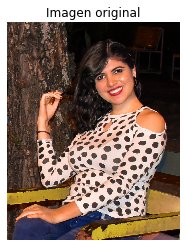

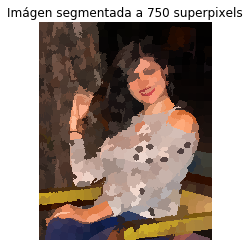

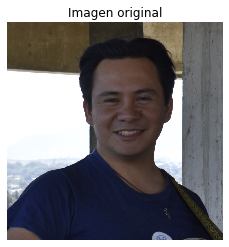

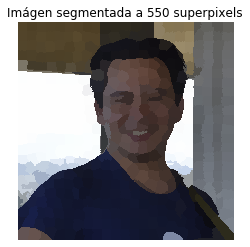

In [35]:
# Import the slic function from segmentation module
from skimage.segmentation import slic
# Import the label2rgb function from color module
from skimage.color import label2rgb


imgName = "./imagenes/Mariana.jpg"    
imgMariana = cv2.imread(imgName)
imgMarianaRGB = cv2.cvtColor(imgMariana, cv2.COLOR_BGR2RGB)
print("Dimensiones Mariana: ",imgMarianaRGB.shape)

imgName2 = "./imagenes/cara.jpg"    
imgCara = cv2.imread(imgName2)
imgCaraRGB = cv2.cvtColor(imgCara, cv2.COLOR_BGR2RGB)
print("Dimensiones Cara: ",imgCaraRGB.shape)




# Obtain the segmentation with 400 regions
segmentsMariana = slic(imgMarianaRGB, n_segments= 750)
segmentsCara = slic(imgCaraRGB, n_segments= 550)

# Put segments on top of original image to compare
imgMarianaRGB_Segmentada = label2rgb(segmentsMariana, imgMarianaRGB, kind='avg')
imgCaraRGB_Segmentada = label2rgb(segmentsCara, imgCaraRGB, kind='avg')

# Show the segmented image
show_image(imgMarianaRGB, "Imagen original")
show_image(imgMarianaRGB_Segmentada, "Imágen segmentada a 750 superpixels")

show_image(imgCaraRGB, "Imagen original")
show_image(imgCaraRGB_Segmentada, "Imágen segmentada a 550 superpixels")


### Identificación de contornos
Para identificar objetos es necesario analizar las imágenes por medio de sus bordes o contornos, dicha acción podra servir para contar objetos, identificar figuras, etc.  
Casi siempre se va a tener una imagen a color RGB y para poder encontrar los bordes o contornos se deben seguir los siguientes pasos:
+ Transformar la imagen de RGB a gris
+ Transformar de gris a blanco y negro (binarización)
+ Encontrar los bordes por medio de la función de Scikit image.

In [44]:
https://campus.datacamp.com/courses/image-processing-in-python/image-restoration-noise-segmentation-and-contours?ex=13
    
    
# Import the measure module
from skimage import measure, color
from skimage.filters import threshold_otsu


imgName = "./imagenes/Mariana.jpg"    
imgMariana = cv2.imread(imgName)
imgMarianaRGB = cv2.cvtColor(imgMariana, cv2.COLOR_BGR2RGB)
print("Dimensiones Mariana: ",imgMarianaRGB.shape)

# Make the image grayscale
imgMarianaGris = color.rgb2gray(imgMarianaRGB)

# Obtain the optimal thresh value
thresh = threshold_otsu(imgMarianaGris)

# Apply thresholding
binary = imgMarianaGris > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
#show_image_contour(imgMarianaGris, contours)
show_image_contour(imgMarianaGris, contours)
#show_image(imgMarianaGris)
#show_image(contours)


Dimensiones Mariana:  (1072, 848, 3)


NameError: name 'show_image_contour' is not defined

In [ ]:
https://campus.datacamp.com/courses/image-processing-in-python/image-restoration-noise-segmentation-and-contours?ex=14
    

# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))


Video de capitulo 4 está al final del capitulo 3.
https://campus.datacamp.com/courses/image-processing-in-python/advanced-operations-detecting-faces-and-features?ex=1
